# Maximum population growth rate ($r_m$) calculations

In [1]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('cowplot')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: patchwork

Loading required package: cowplot


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




Here we first calculate the underlying trait TPCs calculate $r_m$, and then mass-correct it.  

In [2]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Aphis gossypii' ~ '6',
        species == 'Bemisia tabaci' ~ '7',
        species == 'Tetraneura nigriabdominalis' ~ '8',
        species == 'Stethorus punctillum' ~ '9',
        species == 'Tetranychus mcdanieli' ~ '10',
        species == 'Muscidifurax zaraptor' ~ '11',
        species == 'Aphis nasturtii' ~ '12',
        species == 'Rhopalosiphum maidis' ~ '13',
        species == 'Thrips hawaiiensis' ~ '14',
        species == 'Helicoverpa armigera' ~ '15',
        species == 'Scapsipedus icipe' ~ '16',
        species == 'Hyperaspis notata' ~ '17',
        species == 'Toxoptera citricida' ~ '18',
        species == 'Ophraella communa' ~ '19',
        species == 'Bemisia argentifolii' ~ '20',
        species == 'Dactylopius austrinus' ~ '21',
        species == 'Aulacorthum solani' ~ '22')"

In [3]:
# Read in the trait data

alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
  select(species, temp, alpha, alphaLwr, alphaUpr) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)


In [4]:

zj  <- as_tibble(read.csv('../data/zjPredictions.csv'))  %>% 
  select(species, temp, zj, zjLwr, zjUpr) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)

In [5]:
z  <- as_tibble(read.csv('../data/zPredictions.csv'))  %>% 
  select(species, temp, z, zLwr, zUpr) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)


In [6]:
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
  select(species, temp, bmax, bmaxLwr, bmaxUpr) %>%
  mutate(temp = as.numeric(temp)) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  arrange(curve_ID)


In [7]:
df1 <- inner_join(alpha,bmax)

df2 <- inner_join(z, zj)

df <-  inner_join(df1, df2)

df <- df %>% mutate(kappa = 0.01)

Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")
Joining, by = c("species", "temp", "curve_ID")


## Calculate $r_m$ TPCs

In [8]:
# Define parameters

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bmax  <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))

write_csv(df, '../results/r_mCalcs.csv')

In [9]:
bodyMass <- as_tibble(read.csv("../data/sizeMeans.csv")) %>%
            rename(species = interactor1, mass = avg, mass_sd = sd) %>%
            mutate(curve_ID = eval(parse(text=spps))) %>%
            filter(curve_ID != 'NA') %>% arrange(curve_ID)

head(bodyMass)


bodyMass <- bodyMass %>% select(species, mass, curve_ID) 

df <- inner_join(df, bodyMass)

write_csv(df, "../results/rm_optSizeScaling.csv")


species,mass,mass_sd,curve_ID
<chr>,<dbl>,<dbl>,<chr>
Anoplophora glabripennis,159.8000000,NA,1
Tetranychus mcdanieli,0.0243000,0.0002828427,10
Muscidifurax zaraptor,0.8950000,0.0932737905,11
Aphis nasturtii,0.8673000,0.3252394195,12
Rhopalosiphum maidis,0.2995714,0.1664730780,13
Thrips hawaiiensis,0.0400000,NA,14


Joining, by = c("species", "curve_ID")


In [10]:
# truncate data for plotting 

df <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

In [11]:
head(df)

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,8.648649,1018.748,1216.905,835.6234,1,0.4380726,0.1673235,0.6737147,0.008727976,0.010239282,0.006488603,0.004102631,0.007378002,0.002739259,0.01,-0.0009580608,-0.001,0.001585623,159.8
Anoplophora glabripennis,8.693694,1015.469,1212.075,833.3744,1,0.4403504,0.1686414,0.6763729,0.008672757,0.010158733,0.006503853,0.004070656,0.007290267,0.002723784,0.01,-0.0009102896,-0.001,0.001614400,159.8
Anoplophora glabripennis,8.738739,1012.202,1207.266,831.1322,1,0.4426392,0.1699693,0.6790985,0.008618759,0.010081964,0.006519216,0.004038945,0.007203623,0.002708405,0.01,-0.0008627764,-0.001,0.001643212,159.8
Anoplophora glabripennis,8.783784,1008.947,1202.463,828.8967,1,0.4449392,0.1713072,0.6818268,0.008565963,0.010006365,0.006534597,0.004007494,0.007118058,0.002693118,0.01,-0.0008155187,-0.001,0.001671963,159.8
Anoplophora glabripennis,8.828829,1005.703,1197.676,826.6680,1,0.4472503,0.1726553,0.6843153,0.008514349,0.009926010,0.006551434,0.003976302,0.007033557,0.002677923,0.01,-0.0007685136,-0.001,0.001700165,159.8
Anoplophora glabripennis,8.873874,1002.470,1192.909,824.4460,1,0.4495728,0.1740135,0.6866517,0.008463898,0.009845988,0.006568988,0.003945366,0.006950108,0.002662819,0.01,-0.0007217585,-0.001,0.001728011,159.8


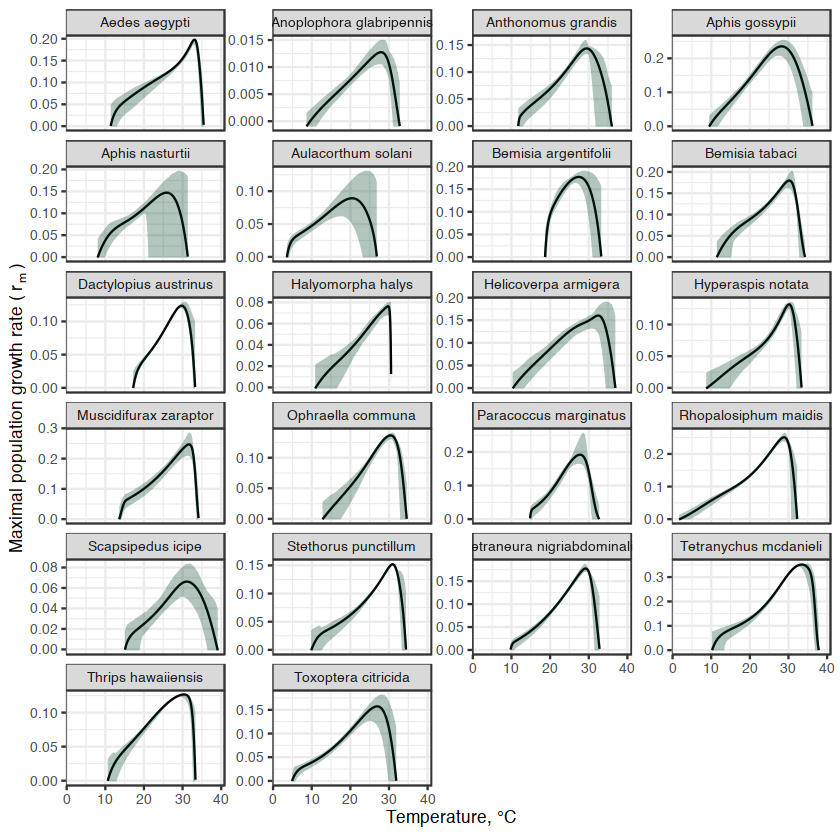

In [12]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), df)+
  facet_wrap(~species, ncol = 4, scales = "free_y")+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), df, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=10, family='Times'))+
  theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot


save_plot(rmPlot, file="../results/SI/rmTPCs.pdf", 
          base_height=16, base_width = 20, base_asp = 1, units="cm")


In [13]:
save_plot(rmPlot, file="../results/SI/rmTPCs.pdf", 
          base_height=15, base_width = 18, base_asp = 1, units="cm")